<a href="https://colab.research.google.com/github/kioneta/ML_first_steps/blob/main/CatnDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score
from IPython.display import HTML
style = "<style>svg{width: 30% !important; height: 60% !important;} </style>"
HTML(style)

In [ ]:
df_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [ ]:
df_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [ ]:
df_train.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [ ]:
df_train['Лазает по деревьям'].unique()

array([0, 1], dtype=int64)

In [ ]:
X = df_train.iloc[:,:-1]
y= df_train['Вид']

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [ ]:
X_train.shape

(670, 5)

In [ ]:
clf = tree.DecisionTreeClassifier() #создаем объект к которому можем использовать методы

In [ ]:
max_depth_values = range(1,100)

In [ ]:
cross_val_score(clf,X_train, y_train, cv=5).mean()
#разбиваем все точки на 5 групп и считаем их как тест и трейн

1.0

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)

    mean_cross_val_score = cross_val_score(clf,X_train, y_train, cv=5).mean()
    #записываем среднее значение и при кросс валидации
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
# Прогоняем углубление дерева решения и для каждого варианта записываем дф

C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.appe

C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.appe

C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_9148\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.appe

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
#преобразовываем в нужный формат данные

<AxesSubplot:xlabel='max_depth', ylabel='score'>

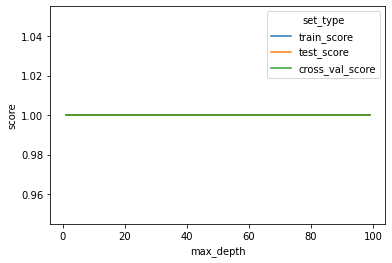

In [ ]:
sns.lineplot(x = 'max_depth',y  = 'score', hue='set_type', data = scores_data_long)

[Text(0.5, 0.75, 'X[0] <= 14.5\nentropy = 1.0\nsamples = 670\nvalue = [335, 335]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 335\nvalue = [335, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 335\nvalue = [0, 335]')]

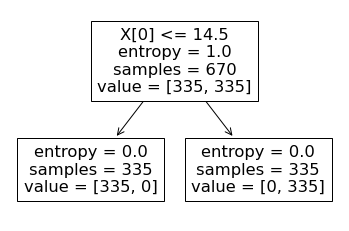

In [ ]:
tree.plot_tree(clf.fit(X_train, y_train))

[Text(0.5, 0.75, 'X[0] <= 14.5\nentropy = 1.0\nsamples = 330\nvalue = [165, 165]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 165\nvalue = [0, 165]')]

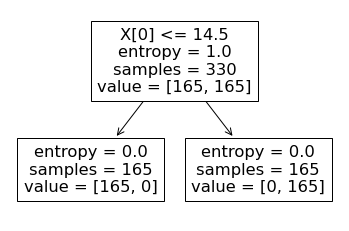

In [ ]:
tree.plot_tree(clf.fit(X_test, y_test))

In [ ]:
df_train['Длина'].describe()

count    1000.00000
mean       16.96800
std         8.88977
min         5.00000
25%         9.00000
50%        14.50000
75%        25.00000
max        34.00000
Name: Длина, dtype: float64

In [ ]:
df_predict = pd.read_json('dataset_209691_15.txt')

In [ ]:
df_predict.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,1,0
1,29,34.8,1,1,0
2,34,40.8,1,1,0
3,20,24.0,1,1,0
4,31,37.2,1,1,0


In [ ]:
clf.predict(df_predict)

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',


In [ ]:
result= clf.predict(df_predict)

In [ ]:
pd.Series(result)[result == 'собачка'].count()

46